 ## Dataset 
 https://www.kaggle.com/datasets/anasmohammedtahir/covidqu

# Train


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

2023-05-14 22:45:52.316306: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-14 22:45:52.344603: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-14 22:45:52.345139: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-14 22:45:52.943307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
# Batch size is the number of training examples used to train the network at a time.

batch_size = 32
image_size = (256, 256)

# validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data.

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = 'dataset/Lung Segmentation Data/Lung Segmentation Data/Train',
    validation_split=0.3,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
    )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = 'dataset/Lung Segmentation Data/Lung Segmentation Data/Val',
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
    )


Found 29014 files belonging to 2 classes.
Using 20310 files for training.
Found 7230 files belonging to 2 classes.
Using 2169 files for validation.


2023-05-14 22:48:13.357488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20310]
	 [[{{node Placeholder/_0}}]]
2023-05-14 22:48:13.357884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [20310]
	 [[{{node Placeholder/_4}}]]


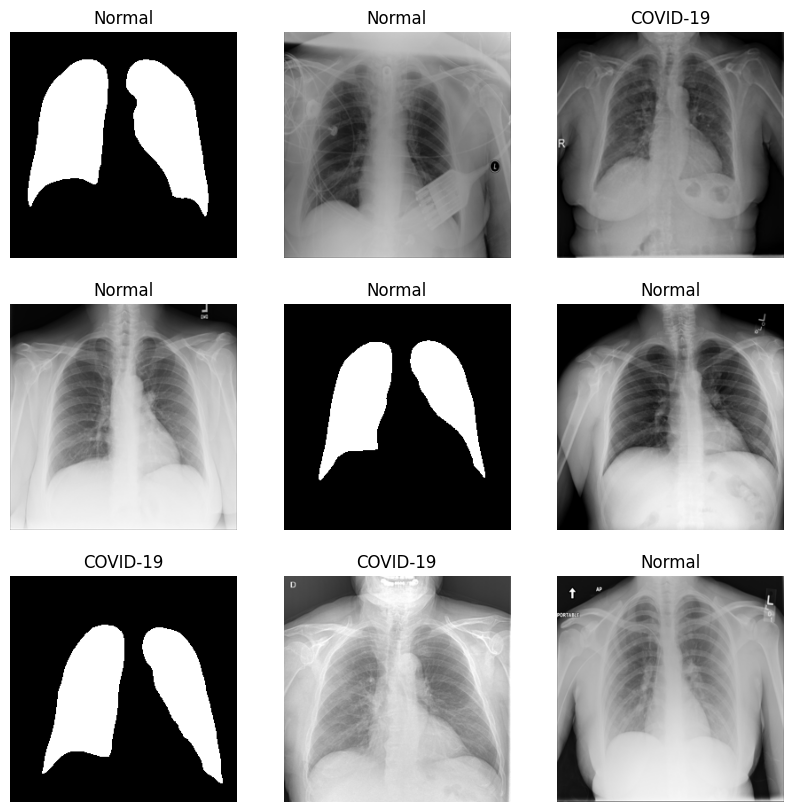

In [5]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()

In [8]:
# Model - The output must be 0 or 1, 0 for covid and 1 for non-covid

model = keras.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

model.summary()

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
    )

# Fixing this warning 2023-05-14 22:28:48.850320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20310]
#	 [[{{node Placeholder/_0}}]]
#2023-05-14 22:28:48.850519: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [20310]
#	 [[{{node Placeholder/_4}}]]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)       

2023-05-14 23:06:17.971888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20310]
	 [[{{node Placeholder/_0}}]]
2023-05-14 23:06:17.980684: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20310]
	 [[{{node Placeholder/_0}}]]


635/635 [==============================] - ETA: 0s - loss: 0.4715 - accuracy: 0.7742

2023-05-14 23:11:21.637305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2169]
	 [[{{node Placeholder/_4}}]]
2023-05-14 23:11:21.637640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2169]
	 [[{{node Placeholder/_0}}]]


635/635 [==============================] - 310s 486ms/step - loss: 0.4715 - accuracy: 0.7742 - val_loss: 0.4051 - val_accuracy: 0.8101
Epoch 2/10
635/635 [==============================] - 308s 485ms/step - loss: 0.3366 - accuracy: 0.8482 - val_loss: 0.3663 - val_accuracy: 0.8253
Epoch 3/10
635/635 [==============================] - 320s 503ms/step - loss: 0.2576 - accuracy: 0.8856 - val_loss: 0.4349 - val_accuracy: 0.7990
Epoch 4/10
635/635 [==============================] - 299s 470ms/step - loss: 0.1871 - accuracy: 0.9226 - val_loss: 0.5060 - val_accuracy: 0.8133
Epoch 5/10
635/635 [==============================] - 305s 481ms/step - loss: 0.1230 - accuracy: 0.9511 - val_loss: 0.5539 - val_accuracy: 0.8294
Epoch 6/10
635/635 [==============================] - 286s 450ms/step - loss: 0.0810 - accuracy: 0.9691 - val_loss: 0.7976 - val_accuracy: 0.8183
Epoch 7/10
635/635 [==============================] - 270s 426ms/step - loss: 0.0560 - accuracy: 0.9785 - val_loss: 0.8670 - val_accura

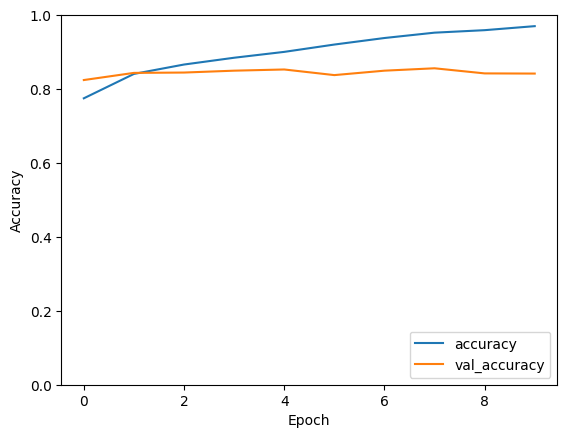

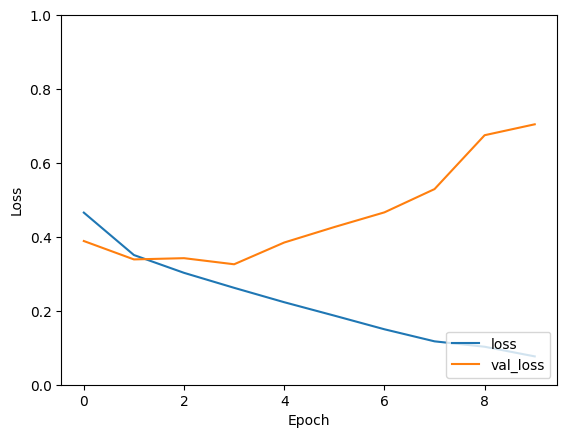

In [ ]:
# Plotting the accuracy and loss of the model

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Now we save the model:
model.save('model/model_covid.h5')